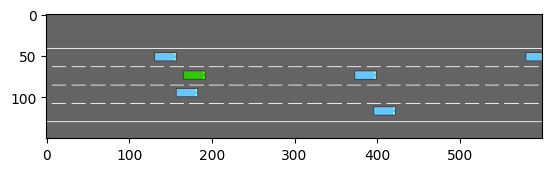

In [1]:
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Controls:
CONTINUOUS_ACTIONS = False
TESTING = False
VERBOSE = False
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-v0', config={"action": {"type": "ContinuousAction"}}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

env.reset()
done = False

if VERBOSE:
    if CONTINUOUS_ACTIONS:
        print(env.action_space.shape)
    else:
        print(env.action_space.n)
    print(env.observation_space.shape)

def get_action():
    if CONTINUOUS_ACTIONS and TESTING:
        return [0]
    elif CONTINUOUS_ACTIONS and not TESTING:
        return [0,0]
    elif not CONTINUOUS_ACTIONS and TESTING:
        return 0
    elif not CONTINUOUS_ACTIONS and not TESTING:
        return env.unwrapped.action_type.actions_indexes["IDLE"]
    return None

try:
    while True and not done:
        action = get_action()
        obs, reward, done, truncated, info = env.step(action)
        env.render()
except KeyboardInterrupt: # Ctrl+C on jupyter
    pass

plt.imshow(env.render())
plt.show()
env.close()

In [2]:
env.close()

In [1]:
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt
from algorithms.REINFORCE import Reinforce
%matplotlib inline

# Controls:
CONTINUOUS_ACTIONS = True
TESTING = False
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-v0', config={"action": {"type": "ContinuousAction"}}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

model = Reinforce(env, episodes=1, flags=[1])
model.learn()

done = truncated = False
obs, info = env.reset()
while not (done or truncated):
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()
env.close()

AttributeError: 'StateValueNN' object has no attribute 'backward'

In [21]:
env.close()